In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config.db_connection import get_db_connection

ModuleNotFoundError: No module named 'db_connection'

In [16]:
conn = get_db_connection()
query = "SELECT * FROM Candidates WHERE contracted = 1"
df = pd.read_sql(query, conn)
conn.close()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19636\768428517.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [17]:
df['application_date'] = pd.to_datetime(df['application_date'])
df['year'] = df['application_date'].dt.year

# 1. Contrataciones por tecnología (Gráfico de pastel)

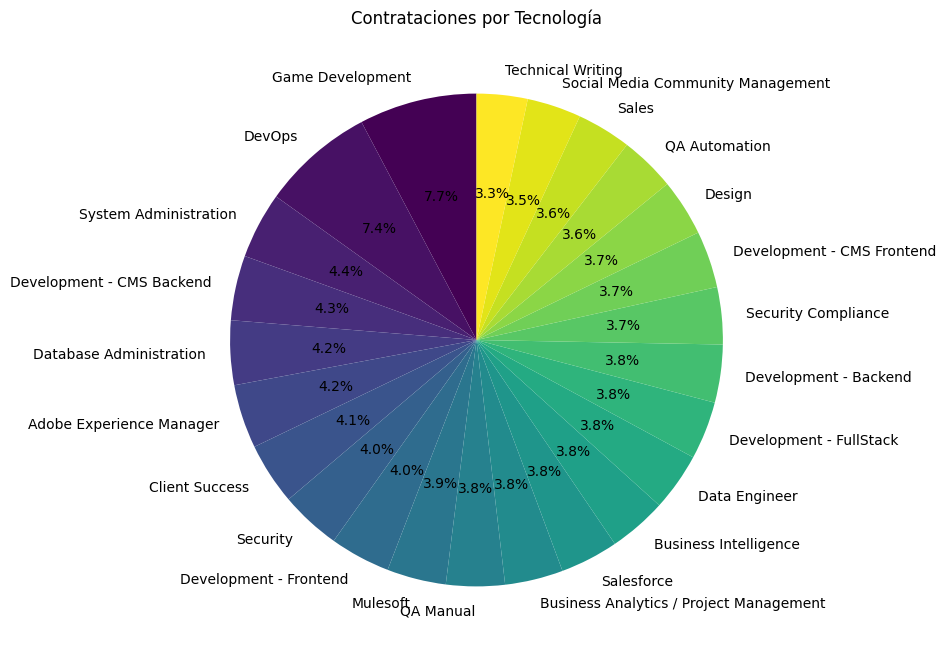

In [ ]:
tech_counts = df['technology'].value_counts()
plt.figure(figsize=(8, 8))
tech_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Contrataciones por Tecnología")
plt.ylabel("")c
plt.show()

# 2. Contrataciones por año (Gráfico de barras horizontal)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19636\2273226253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=year_counts.index.astype(str), x=year_counts.values, palette='Blues_r')


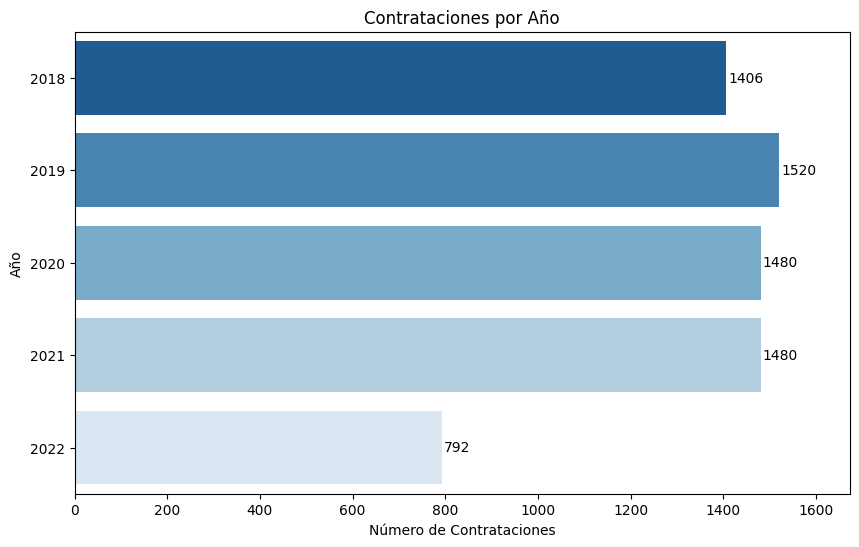

In [31]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=year_counts.index.astype(str), x=year_counts.values, palette='Blues_r')

for index, (year, value) in enumerate(zip(year_counts.index, year_counts.values)):
    ax.text(value + 5, index, str(value), va='center', fontsize=10)

plt.xlabel("Número de Contrataciones")
plt.ylabel("Año")
plt.title("Contrataciones por Año")
plt.xlim(0, year_counts.max() * 1.1)
plt.show()

# 3. Contrataciones por nivel de experiencia (Gráfico de barras)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19636\540343245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette='pastel')


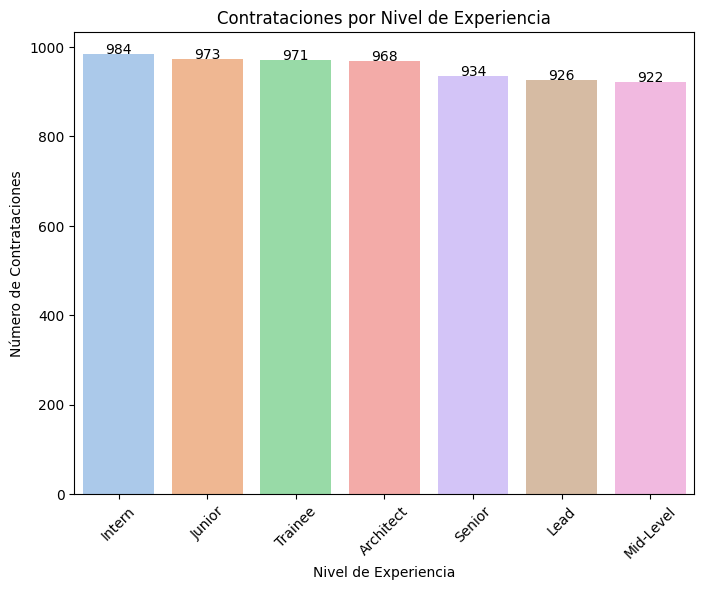

In [29]:
seniority_counts = df['seniority'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette='pastel')

for index, value in enumerate(seniority_counts.values):
    ax.text(index, value + 1, str(value), ha='center', fontsize=10)

plt.xlabel("Nivel de Experiencia")
plt.ylabel("Número de Contrataciones")
plt.title("Contrataciones por Nivel de Experiencia")
plt.xticks(rotation=45)
plt.show()

# 4. Contrataciones por país a lo largo de los años (Gráfico de líneas múltiples)

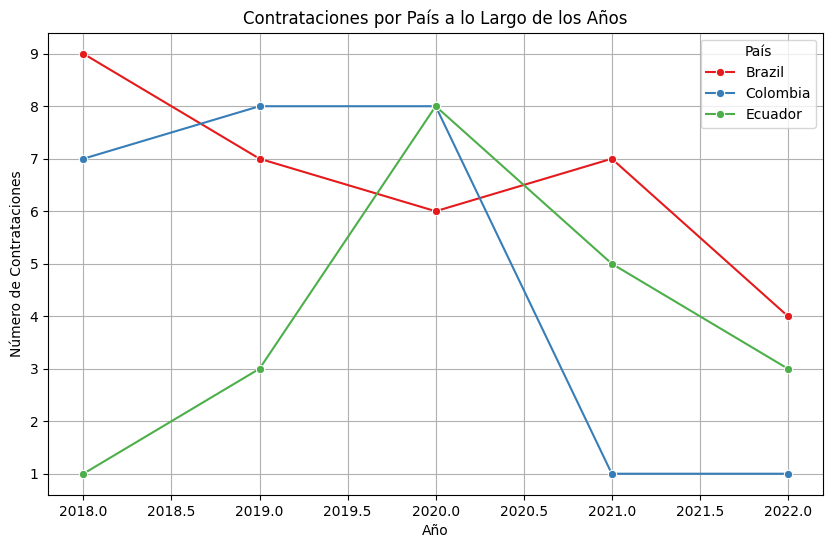

In [22]:
countries = ['USA', 'Brazil', 'Colombia', 'Ecuador']
df_filtered = df[df['country'].isin(countries)]
df_grouped = df_filtered.groupby(['year', 'country']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='country', marker='o', palette='Set1')
plt.xlabel("Año")
plt.ylabel("Número de Contrataciones")
plt.title("Contrataciones por País a lo Largo de los Años")
plt.legend(title="País")
plt.grid(True)
plt.show()